# 机器学习——06逻辑回归

## 参考资料

1. [AIlearning](https://ailearning.apachecn.org/#/docs/ml/2)
2. [Machine-Learning-in-Action](https://github.com/TeFuirnever/Machine-Learning-in-Action)
3. 庞善民.西安交通大学机器学习导论2022春PPT

使用Jupyter进行练习，python3

Logistic 回归或者叫逻辑回归 虽然名字有回归，但是它是用来做**分类**的。其主要思想是: 根据现有数据对分类边界线(Decision Boundary)建立回归公式，以此进行分类。

## 一、概念

### 回归

假设现在有一些数据点，我们用一条直线对这些点进行拟合（这条直线称为最佳拟合直线），这个拟合的过程就叫做回归。进而可以得到对这些点的拟合直线方程，那么我们根据这个回归方程，怎么进行分类呢？请看下面。

### 二值型输出分类函数

我们想要的函数应该是: 能接受所有的输入然后预测出类别。例如，在两个类的情况下，上述函数输出 0 或 1.或许你之前接触过具有这种性质的函数，该函数称为 `海维塞得阶跃函数(Heaviside step function)`，或者直接称为 `单位阶跃函数`。然而，海维塞得阶跃函数的问题在于: 该函数在跳跃点上从 0 瞬间跳跃到 1，这个瞬间跳跃过程有时很难处理。幸好，另一个函数也有类似的性质（可以输出 0 或者 1 的性质），且数学上更易处理，这就是 Sigmoid 函数。 Sigmoid 函数具体的计算公式如下:

$$
\sigma(z) = \frac{1}{1+e^{-z}}
$$

Sigmoid 函数具有如下特点

+ 单调递增、任意阶可微

+ 输出值在𝑧= 0 附近变化很快

<img src="https://note-image-1307786938.cos.ap-beijing.myqcloud.com/typora/qshell/image-20220318153401929.png" alt="image-20220318153401929" style="zoom:67%;" />

因此，为了实现 Logistic 回归分类器，我们可以在每个特征上都乘以一个回归系数（如下公式所示），然后把所有结果值相加，将这个总和代入 Sigmoid 函数中，进而得到一个范围在 0~1 之间的数值。任何大于 0.5 的数据被分入 1 类，小于 0.5 即被归入 0 类。所以，Logistic 回归也是一种概率估计，比如这里Sigmoid 函数得出的值为0.5，可以理解为给定数据和参数，数据被分入 1 类的概率为0.5。

### 基于最优化方法的回归系数确定

Sigmoid 函数的输入记为 z ，由下面公式得到:

$$
z=w_0x_0+w_1x_1+w_2x_2+\cdots+w_nx_n
$$

如果采用向量的写法，上述公式可以写成 $z=\pmb W^T\pmb X$ ，它表示将这两个数值向量对应元素相乘然后全部加起来即得到 z 值。其中的向量 $\pmb X$ 是分类器的输入数据，向量 $\pmb W$ 也就是我们要找到的最佳参数（系数），从而使得分类器尽可能地精确。为了寻找该最佳参数，需要用到最优化理论的一些知识。我们这里使用的是——梯度上升法`（Gradient Ascent）`。

### 极大似然估计

极大似然估计法是参数点估计中的一个重要方法,它是**利用总体的分布函数的表达式及样本所提供的信息建立未知参数估计量的方法**.它的直观解释为:设一个随机试验有若干个可能结果，如果在某次试验中，某一结果A出现了，那么，我们认为在诸多可能的试验条件中，应该是使事件 A 发生的概率为最大的那一种条件，这就是极大似然估计的基本思想。即从**若干个参数集合中选取使样本出现概率最大的参数**。

**定义**

设总体X为连续型随机变量，其密度函数为$f(x;\theta_1,\theta_2,\theta_3,...,\theta_t)$,其中$\theta_1,\theta_2,\theta_3,...,\theta_t$为位置参数，则如下公式为参数$\theta_1,\theta_2,\theta_3,...,\theta_t$的**似然函数**
$$
L(\theta_1,\theta_2,...,\theta_t)=\prod_{i=1}^nf(x_i;\theta_1,\theta_2,...,\theta_t)
$$
如果$\hat{\theta_j}(x_1,x_2,...,x_n),j=1,2,...,t$满足使似然函数罪罚，则称其为${\theta_j}(x_1,x_2,...,x_n),j=1,2,...,t$的极大似然估计值，相应的统计量$\hat{\theta_j}(X_1,X_2,...,X_n),j=1,2,...,t$为极大似然估计量

极大似然估计法就是当得到样本值$(x_1,x_2,x_3,...,x_n)$时选取$(\hat{\theta_1},\hat{\theta_2},...,\hat{\theta_t})$ 使得似然函数最大，因为lnx是x的单调递增函数，因此$\ln L(\theta_1,\theta_2,\theta_3,...,\theta_t)$与$L(\theta_1,\theta_2,\theta_3,...,\theta_t)$有相同的极大值点，故极大似然估计$(\hat{\theta_1},\hat{\theta_2},...,\hat{\theta_t})$ 可等价定义为
$$
\ln L(\hat{\theta_1},\hat{\theta_2},...,\hat{\theta_t})=\underset{(\theta_1,\theta_2,,...,\theta_t)\in \Theta}{max}\ln L(\theta_1,\theta_2,...,\theta_t)
$$
很多情况下，似然函数$L(\theta_1,\theta_2,...,\theta_t)$和对数似然函数关于$\theta_1,\theta_2,...,\theta_t$的偏导数存在，这时$\hat{\theta_1},\hat{\theta_2},...,\hat{\theta_t}$可以从方程组
$$
\frac{\partial L(\theta_1,\theta_2,...,\theta_t)}{\partial \theta_j}=0\ (j=1,2,...,t)
$$
或者
$$
\frac{\partial\ln L(\theta_1,\theta_2,...,\theta_t)}{\partial \theta_j}=0\ (j=1,2,...,t)
$$
解得

### 系数求解

对Θ进行极大似然 估计，使得观测数据发生的概率最大：

![image-20220318162048288](https://note-image-1307786938.cos.ap-beijing.myqcloud.com/typora/qshell/image-20220318162048288.png)

转换为对数似然，有

![image-20220318162227593](https://note-image-1307786938.cos.ap-beijing.myqcloud.com/typora/qshell/image-20220318162227593.png)

极大似然法要求最大值，所以使用梯度上升来求

> 在求极值的问题中，有梯度上升和梯度下降两个最优化方法。
>
> 梯度上升用于求极大值，梯度下降用于求极小值。如logistic回归的目标函数 是求参向量𝜃，使得对数似然函数达到最大值，所以使用梯度上升算法。
>
> 而线性回归的代价函数：代表的则是误差，我们想求误差最小值，所以用 梯度下降算法。

梯度上升公式如下：
$$
\theta^{(t+1)}=\theta^{(t)}+\alpha \nabla_\theta \ln({L(\theta^{(t)})})
$$
**求梯度如下**：

<img src="https://note-image-1307786938.cos.ap-beijing.myqcloud.com/typora/qshell/image-20220318163554005.png" alt="image-20220318163554005" style="zoom:80%;" />

得到：

![image-20220318163833614](https://note-image-1307786938.cos.ap-beijing.myqcloud.com/typora/qshell/image-20220318163833614.png)

与线性回归的公式很相似   $\theta_j^{(t+1)}:=\theta_j^{(t)}-\alpha\sum^n_{i=1}(f(x_i)-y_i)x_{i,j}$

### 梯度上升/下降法

#### 复习梯度

梯度的本意是一个向量（矢量），表示某一函数在该点处的方向导数沿着该方向取得最大值，即函数在该点处沿着该方向（此梯度的方向）变化最快，变化率最大（为该梯度的模）。

设二元函数$z=f(x,y)$在平面区域D上具有一阶连续偏导数，则对于每一个点P（x，y）都可定出一个向量

<img src="https://bkimg.cdn.bcebos.com/formula/2bbe458bd2dec7b2cdacb5954d49a568.svg" alt="img" style="zoom: 85%;"/>

,该函数就称为函数$z=f(x,y)$在点P（x，y）的梯度，记作gradf（x，y）或$\nabla f(x,y)$,即有：
$$
gradf(x,y)=\nabla f(x,y)=\{\frac{\partial f}{\partial x},\frac{\partial f}{\partial y}\}=f_x(x,y)\vec{i}+f_y(x,y)\vec{j}
$$
其中$\nabla = \frac{\partial}{\partial x}\vec{i}+\frac{\partial}{\partial y}\vec{j}$称为（二维的）向量[微分算子](https://baike.baidu.com/item/微分算子)或[Nabla算子](https://baike.baidu.com/item/Nabla算子/22786343)，$\nabla f = \frac{\partial f}{\partial x}\vec{i}+\frac{\partial f}{\partial y}\vec{j}$

![梯度上升](https://note-image-1307786938.cos.ap-beijing.myqcloud.com/typora/LR_8.png)

上图展示的，梯度上升算法到达每个点后都会重新估计移动的方向。从 P0 开始，计算完该点的梯度，函数就根据梯度移动到下一点 P1。在 P1 点，梯度再次被重新计算，并沿着新的梯度方向移动到 P2 。如此循环迭代，直到满足停止条件。迭代过程中，梯度算子总是保证我们能选取到最佳的移动方向。

上图中的梯度上升算法沿梯度方向移动了一步。可以看到，梯度算子总是指向函数值增长最快的方向。这里所说的是移动方向，而未提到移动量的大小。该量值称为步长，记作 α 。用向量来表示的话，梯度上升算法的迭代公式如下:

$$
w^{(t+1)} = w^{(t)} + \alpha\nabla_{ w}f(w)
$$

该公式将一直被迭代执行，直至达到某个停止条件为止，比如迭代次数达到某个指定值或者算法达到某个可以允许的误差范围。

> 例如: y = w0 + w1x1 + w2x2 + ... + wnxn 
>
> 梯度: 参考上图的例子，二维图像，x方向代表第一个系数，也就是 w1，y方向代表第二个系数也就是 w2，这样的向量就是梯度。 
>
> α: 上面的梯度算法的迭代公式中的阿尔法，这个代表的是移动步长（step length）。移动步长会影响最终结果的拟合程度，最好的方法就是随着迭代次数更改移动步长。 步长通俗的理解，100米，如果我一步走10米，我需要走10步；如果一步走20米，我只需要走5步。这里的一步走多少米就是步长的意思。 ▽f(w): 代表沿着梯度变化的方向。

梯度上升和梯度下降本质上是相同的：关键在于代价函数（cost function）或者叫目标函数（objective function）。如果目标函数是损失函数，那就是最小化损失函数来求函数的最小值，就用梯度下降。 如果目标函数是似然函数（Likelihood function），就是要最大化似然函数来求函数的最大值，那就用梯度上升。在逻辑回归中， 损失函数和似然函数无非就是互为正负关系。

梯度下降的公式如下：

$$
w^{(t+1)} = w^{(t)} - \alpha\nabla_{ w}f(w)
$$

#### 梯度下降求解

梯度下降是一种计算局部最小值的一种方法。梯度下降思想就是给定一个初始值𝜃，每次沿着函数梯度下降的方向移动𝜃：

<img src="https://note-image-1307786938.cos.ap-beijing.myqcloud.com/typora/qshell/image-20220316231646546.png" alt="image-20220316231646546" style="zoom: 67%;"/>

![image-20220316231407132](https://note-image-1307786938.cos.ap-beijing.myqcloud.com/typora/qshell/image-20220316231407132.png)

在梯度为零或趋近于零的时候收敛
$$
J(\theta)=\frac{1}{2}\sum^n_{i=1}(x_i^T\theta-y_i)^2
$$
对损失函数求偏导可得到
$$
x_i=(x_{i,0},...,x_{i,p})^T\\
x_{ij}表示第i个样本的第j个分量\\
\frac{\partial}{\theta_j}\frac{1}{2}(x_i^T\theta-y_i)^2=\frac{\partial}{\theta_j}\frac{1}{2}(\sum^p_{j=0}x_{i,j}\theta_j-y_i)^2=(\sum^p_{j=0}x_{i,j}\theta_j-y_i)x_{i,j}=(f(x_i-y_i))x_{i,j}
\\
\nabla_\theta J=\begin{bmatrix}
\frac{J}{\theta_0}\\
\frac{J}{\theta_1}\\...\\
\frac{J}{\theta_p}
\end{bmatrix}
$$
对于只有一个训练样本的训练组而言，每走一步，𝜃𝑗(𝑗= 0,1,…,𝑝)的更新公式就可以写成：

<img src="https://note-image-1307786938.cos.ap-beijing.myqcloud.com/typora/qshell/image-20220316233051758.png" alt="image-20220316233051758" style="zoom:80%;"/>

因此，当有 n 个训练实例的时候（批处理梯度下降算法），该公式就可以写为：
$$
\theta_j^{(t+1)}:=\theta_j^{(t)}-\alpha\sum^n_{i=1}(f(x_i)-y_i)x_{i,j}
$$
这样，每次根据所有数据求出偏导，然后根据特定的步长𝛼，就可以不断更新𝜃𝑗，直到其收敛。当<mark>梯度为0或目标函数值不能继续下降的时候</mark>，就可以说已经收敛，即目标函数达到局部最小值。

具体过程可以归纳如下

> :one: 初始化𝜃（随机初始化）
>
> :two: 利用如下公式更新𝜃
> $$
> \theta_j^{(t+1)}:=\theta_j^{(t)}-\alpha\sum^n_{i=1}(f(x_i)-y_i)x_{i,j}
> $$
> 其中α为步长(学习率)
>
> :three: 如果新的𝜃能使𝐽(𝜃)继续减少，继续利用上述步骤更新𝜃，否则收敛，停止迭代。
>
> > 如何判断收敛？<img src="https://note-image-1307786938.cos.ap-beijing.myqcloud.com/typora/qshell/image-20220316233856578.png" alt="image-20220316233856578" style="zoom:67%;"/>

#### 局部最优现象(Local Optima)

 ![梯度下降图_4](https://note-image-1307786938.cos.ap-beijing.myqcloud.com/typora/LR_20.png)


上图表示参数 θ 与误差函数 J(θ) 的关系图 (这里的误差函数是损失函数，所以我们要最小化损失函数)，红色的部分是表示 J(θ) 有着比较高的取值，我们需要的是，能够让 J(θ) 的值尽量的低。也就是深蓝色的部分。θ0，θ1 表示 θ 向量的两个维度（此处的θ0，θ1是x0和x1的系数，也对应的是上文w0和w1）。

可能梯度下降的最终点并非是全局最小点，可能是一个局部最小点，如我们上图中的右边的梯度下降曲线，描述的是最终到达一个局部最小点，这是我们重新选择了一个初始点得到的。

看来我们这个算法将会在很大的程度上<mark>被初始点的选择影响而陷入局部最小点</mark>。

## 二、Logistic回归原理

### 工作原理

+ 每个回归系数初始化为 1

+ 重复 R 次:
    
    + 计算整个数据集的梯度
    
    + 使用 步长 x 梯度 更新回归系数的向量

+ 返回回归系数

### 开发流程

收集数据: 采用任意方法收集数据

准备数据: 由于需要进行距离计算，因此要求数据类型为数值型。另外，结构化数据格式则最佳。

分析数据: 采用任意方法对数据进行分析。

训练算法: 大部分时间将用于训练，训练的目的是为了找到最佳的分类回归系数。

测试算法: 一旦训练步骤完成，分类将会很快。

使用算法: 首先，我们需要输入一些数据，并将其转换成对应的结构化数值；接着，基于训练好的回归系数就可以对这些数值进行简单的回归计算，判定它们属于哪个类别；在这之后，我们就可以在输出的类别上做一些其他分析工作。


### 算法特点

+ 优点: 计算代价不高，易于理解和实现。

+ 缺点: 容易欠拟合，分类精度可能不高。

+ 适用数据类型: 数值型和标称型数据。



## 三、项目案例1：使用Logistic回归在简单数据集上的分类

### 项目概述

在一个简单的数据集上，采用梯度上升法找到 Logistic 回归分类器在此数据集上的最佳回归系数

### 开发流程

1、收集数据: 可以使用任何方法

2、准备数据: 由于需要进行距离计算，因此要求数据类型为数值型。另外，结构化数据格式则最佳

3、分析数据: 画出决策边界

4、训练算法: 使用梯度上升找到最佳参数

5、测试算法: 使用 Logistic 回归进行分类

6、使用算法: 对简单数据集中数据进行分类

### 收集数据
采用存储在 `TestSet.txt` 文本文件中的数据，存储格式如下:
```
-0.017612    14.053064   0
-1.395634    4.662541    1
-0.752157    6.538620    0
-1.322371    7.152853    0
0.423363    11.054677    0
```

绘制在图中，如下图所示:



![简单数据集绘制在图上](https://note-image-1307786938.cos.ap-beijing.myqcloud.com/typora/LR_11.png)

### 准备数据

由于需要进行距离计算，因此要求数据类型为数值型。另外，结构化数据格式则最佳

In [23]:
from numpy import *
import matplotlib.pyplot as plt

def loadData(fileName):
    """加载数据:解析以tab键分隔的文件中的浮点数

    Args:
        fileName : 数据集文件

    Returns:
        data :   feature 对应的数据集
        label :  feature 对应的分类标签，即类别标签
    """
    # data为原始数据， label为原始数据的标签
    data = []
    label = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = line.strip().split()
        # 为了方便计算，我们将 X0 的值设为 1.0 ，也就是在每一行的开头添加一个 1.0 作为 X0
        data.append([1.0, float(lineArr[0]), float(lineArr[1])])
        label.append(int(lineArr[2]))
    return data, label


data, label = loadData('data/TestSet.txt')

### 训练算法

使用梯度上升找到最佳参数

In [37]:
def sigmoid(X):
    return 1.0 / (1 + exp(-X))
    

def gradAscent(data, label, alpha = 0.001, cycles = 500):
    """梯度上升法

    Args:
        data  :  feature 对应的数据集
        label :  feature 对应的分类标签，即类别标签
        alpha :  步长. Defaults to 0.001.
        cycles:  迭代次数. Defaults to 500.

    Returns:
        weights: 回归系数
    """    
    # 转化为矩阵
    XMat = mat(data)             # 转换为 NumPy 矩阵
    yMat = mat(label).transpose() 
    # m->数据量，样本数 n->特征数
    _,n = shape(XMat)
    # 生成一个长度和特征数相同的回归系数矩阵，此处n为3 -> [[1],[1],[1]]
    weights = ones((n,1))
    for i in range(cycles):    
        # m*3 的矩阵 * 3*1 的矩阵 ＝ m*1的矩阵
        f = sigmoid(XMat*weights)    
        error = (yMat - f)# 向量相减
        # 0.001* (3*m)*(m*1) 表示在每一个列上的一个误差情况，最后得出 x0, x1, x2的系数的偏移量
        weights = weights + alpha * XMat.transpose() * error # 矩阵乘法，最后得到回归系数
    return array(weights)


weights = gradAscent(data, label)
print(weights)

[[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]]


画出数据集和 Logistic 回归最佳拟合直线的函数

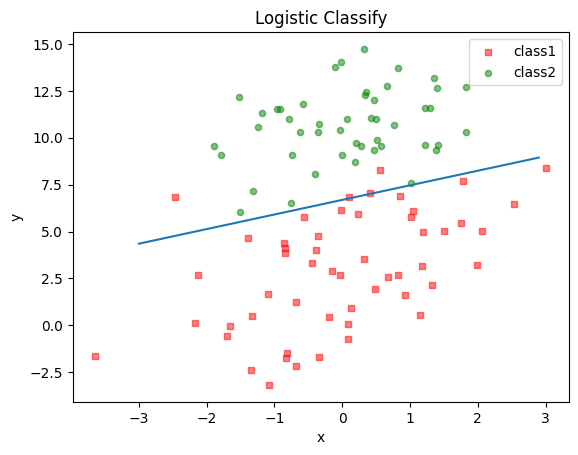

In [36]:
import matplotlib.pyplot as plt


def plotBestFit(data, label, weights):
    """画出数据集和 Logistic 回归最佳拟合直线的函数

    Args:
        data: 样本数据的特征
        label: 样本数据的类别标签，即目标变量
        weights: 回归系数
    """                                     
    dataArr = array(data)                                         #转换成numpy的array数组
    n = shape(data)[0]                                            #数据个数
    xcord1 = []; ycord1 = []                                            #正样本
    xcord2 = []; ycord2 = []                                            #负样本
    for i in range(n):                                                  #根据数据集标签进行分类
        if int(label[i]) == 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])    #1为正样本
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])    #0为负样本
    fig = plt.figure()
    ax = fig.add_subplot(111)                                           #添加subplot
    ax.scatter(xcord1, ycord1, s = 20, c = 'red', marker = 's',alpha=.5,label='class1')#绘制正样本
    ax.scatter(xcord2, ycord2, s = 20, c = 'green',alpha=.5,label='class2')            #绘制负样本
    plt.title('Logistic Classify')                                                #绘制title
    #添加图例
    ax.legend()
    """
    w0*x0+w1*x1+w2*x2=f(x)
    x0最开始就设置为1叻， x2就是我们画图的y值，而f(x)被算到w0,w1,w2身上去了
    所以:  w0+w1*x+w2*y=0 => y = (-w0-w1*x)/w2   
    """
    x = arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('x'); 
    plt.ylabel('y')                                   
    plt.show()   

plotBestFit(data, label, weights)

### 注意点

梯度上升算法在每次更新回归系数时都需要遍历整个数据集，该方法在处理 100 个左右的数据集时尚可，但如果有数十亿样本和成千上万的特征，那么该方法的计算复杂度就太高了。一种改进方法是一次仅用一个样本点来更新回归系数，该方法称为 `随机梯度上升算法`。由于可以在新样本到来时对分类器进行增量式更新，因而随机梯度上升算法是一个`在线学习(online learning)算法`。与 “在线学习” 相对应，一次处理所有数据被称作是 `“批处理” （batch）` 。

随机梯度上升算法可以写成如下的伪代码：
```
所有回归系数初始化为 1
对数据集中每个样本
    计算该样本的梯度
    使用 alpha x gradient 更新回归系数值
返回回归系数值
```

In [56]:
def stochasticGradAscent1(data, label, alpha = 0.001):
    """随机梯度上升法
       随机梯度上升一次只用一个样本点来更新回归系数
    Args:
        data  :  feature 对应的数据集
        label :  feature 对应的分类标签，即类别标签
        alpha :  步长. Defaults to 0.001.
    Returns:
        weights: 回归系数
    """   
    m,n = shape(data)
    alpha = 0.01

    weights = ones(n)   # 初始化长度为n的数组，元素全部为 1
    for i in range(m):
        # sum(data[i]*weights)为了求 f(x)的值， f(x)=a1*x1+b2*x2+..+nn*xn,
        # 此处求出的 h 是一个具体的数值，而不是一个矩阵
        h = sigmoid(sum(data[i]*weights))
        # 计算真实类别与预测类别之间的差值，然后按照该差值调整回归系数
        error = label[i] - h
        weights = weights + alpha * error * array(data[i])
    return weights 


可以看到，随机梯度上升算法与梯度上升算法在代码上很相似，但也有一些区别: 第一，后者的变量 h 和误差 error 都是向量，而前者则全是数值；第二，前者没有矩阵的转换过程，所有变量的数据类型都是 NumPy 数组。

判断优化算法优劣的可靠方法是看它是否收敛，也就是说参数是否达到了稳定值，是否还会不断地变化？下图展示了随机梯度上升算法在 200 次迭代过程中回归系数的变化情况。其中的系数2，也就是 X2 只经过了 50 次迭代就达到了稳定值，但系数 1 和 0 则需要更多次的迭代。如下图所示:

![image-20221219221028142](https://note-image-1307786938.cos.ap-beijing.myqcloud.com/typora/image-20221219221028142.png)

针对这个问题，我们改进了之前的随机梯度上升算法，如下:

[ 8.71958654  2.2169986  -1.16267236]


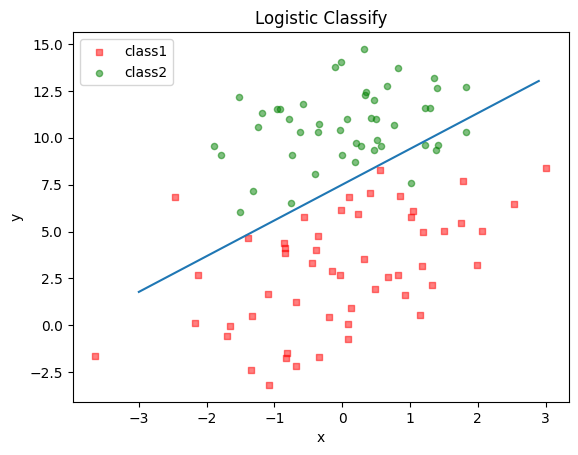

In [67]:
def stochasticGradAscent2(data, label, cycles = 500):
    """随机梯度上升法
       随机梯度上升一次只用一个样本点来更新回归系数
    Args:
        data  :  feature 对应的数据集
        label :  feature 对应的分类标签，即类别标签
        cycles:  迭代次数. Defaults to 500.
    Returns:
        weights: 回归系数
    """   
    m,n = shape(data)
    alpha = 0.01
    # n*1的矩阵
    # 函数ones创建一个全1的数组
    weights = ones(n)   # 初始化长度为n的数组，元素全部为 1
    for j in range(cycles):
        # [0, 1, 2 .. m-1]
        dataIndex =  list(range(m))
        for i in range(m):
            # i和j的不断增大，导致alpha的值不断减少，但是不为0
            alpha = 4/(1.0+j+i)+0.0001 
            # 随机产生一个 0～len()之间的一个值
            # random.uniform(x, y) 方法将随机生成下一个实数，它在[x,y]范围内,x是这个范围内的最小值，y是这个范围内的最大值。
            randIndex = int(random.uniform(0,len(dataIndex))) 
            h = sigmoid(sum(data[dataIndex[randIndex]]*weights))
            error = label[dataIndex[randIndex]] - h
            weights = weights + alpha * error * array(data[i])
            # 删除该下标，避免再选到
            del(dataIndex[randIndex])
    return weights 

weights2 = stochasticGradAscent2(data, label)
print(weights2)
plotBestFit(data, label, weights2)

上面的改进版随机梯度上升算法，我们修改了两处代码。

第一处改进为 alpha 的值。alpha 在每次迭代的时候都会调整，这回缓解上面波动图的数据波动或者高频波动。另外，虽然 alpha 会随着迭代次数不断减少，但永远不会减小到 0，因为我们在计算公式中添加了一个常数项。

第二处修改为 randIndex 更新，这里通过随机选取样本拉来更新回归系数。这种方法将减少周期性的波动。这种方法每次随机从列表中选出一个值，然后从列表中删掉该值（再进行下一次迭代）。
